# Descriptive Statistics and Data Visualization
This notebook covers exploratory analysis for 430 features<br>
coming from 9 different categories of clinical data<br>
The analysis will include three steps:<br>
1. Extract Descriptive Statistics for each feature
2. Visualize the distribution 
3. Brief Summary of Findings

<br>

| Table Name |variable prefix|columns |DType |Description | 
| :--- | :--- | :--- | :--- | :--- |
| Research Session Attendance|rsa_|25 |Binary|Records attendence for each week of treatment | 
| Demographics|dem_|10 |Categorical|Sex, Ethnicity, Race | 
| Urine Drug Screen| test_|225|Binary  |Drug test for 8 different drug classes, taken weekly for 24 weeks | 
| DSM-IV Diagnosis|dsm_|6|Categorical |Tracks clinical diagnosis for substance use disorder, in accordance with DSM guidelines| 
| Medical and Psychiatric History|mdh_|18|Categorical |Tracks medical and psychiatric history of 18 different Conditions| 
| Physical Exam|pex_|12|Categorical |Tracks the appearance and condition of patients for 12 different physical observations| 
| Timeline Follow Back Survey|survey_|70|Numeric |Surveys for self reported drug use, collected every 4 weeks, records total number of instances of drug use for the previous 30 days|
| Dose Record |meds_|50|Numeric |Records the medication, averge weekly dose and week of treatment| 


### Import Required Libraries

In [19]:
import pandas as pd # data manipulation
import numpy as np # numerical computation
import matplotlib.pyplot as plt # visualization
import seaborn as sns # enhanced visualization
import warnings # ignore warnings
import helper # custom data transformation functions
from IPython.display import display, Markdown # display and markdown conversion
import re # regular expressions
warnings.filterwarnings('ignore') # ignore warnings

# Load the data
data = pd.read_csv('../data/63_features.csv')

# Display the first few rows of the data
print('Data shape:', data.shape)
display(data)

Data shape: (1269, 63)


,test_oxycodone_0,test_cocaine_0,test_methamphetamine_0,test_opiate300_0,test_oxycodone_1,test_cocaine_1,test_methamphetamine_1,test_opiate300_1,test_oxycodone_2,test_cocaine_2,...,pex_musculoskeletal,pex_gi_system,pex_extremeties,pex_neurological,pex_gen_appearance,pex_ears_nose_throat,pex_head_neck,pex_cardio,pex_skin,dropout
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1265,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1266,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1267,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0


## Create Density Plot for Dropout

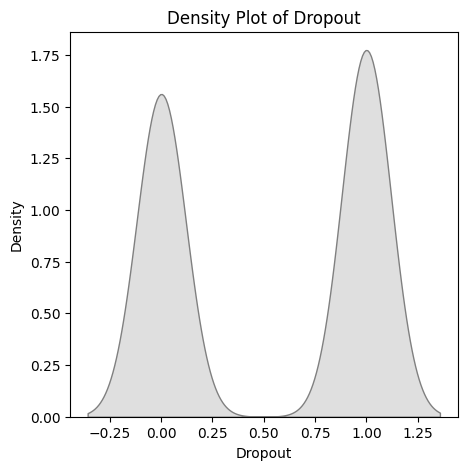

In [20]:
# create a density plot for dropout
plt.figure(figsize=(5, 5))
sns.kdeplot(data['dropout'], shade=True, color='gray')
plt.title('Density Plot of Dropout')
plt.xlabel('Dropout')
plt.ylabel('Density')
plt.show()

## Create Dual Bar Plot for Medication Dose Table

In [21]:
# subset methadone patients
meds_m = data[[col for col in data.columns if 'meds_m' in col]].iloc[:, 1:5]

# subset buprenorphine patients
meds_b = data[[col for col in data.columns if 'meds_b' in col]].iloc[:, 1:5]

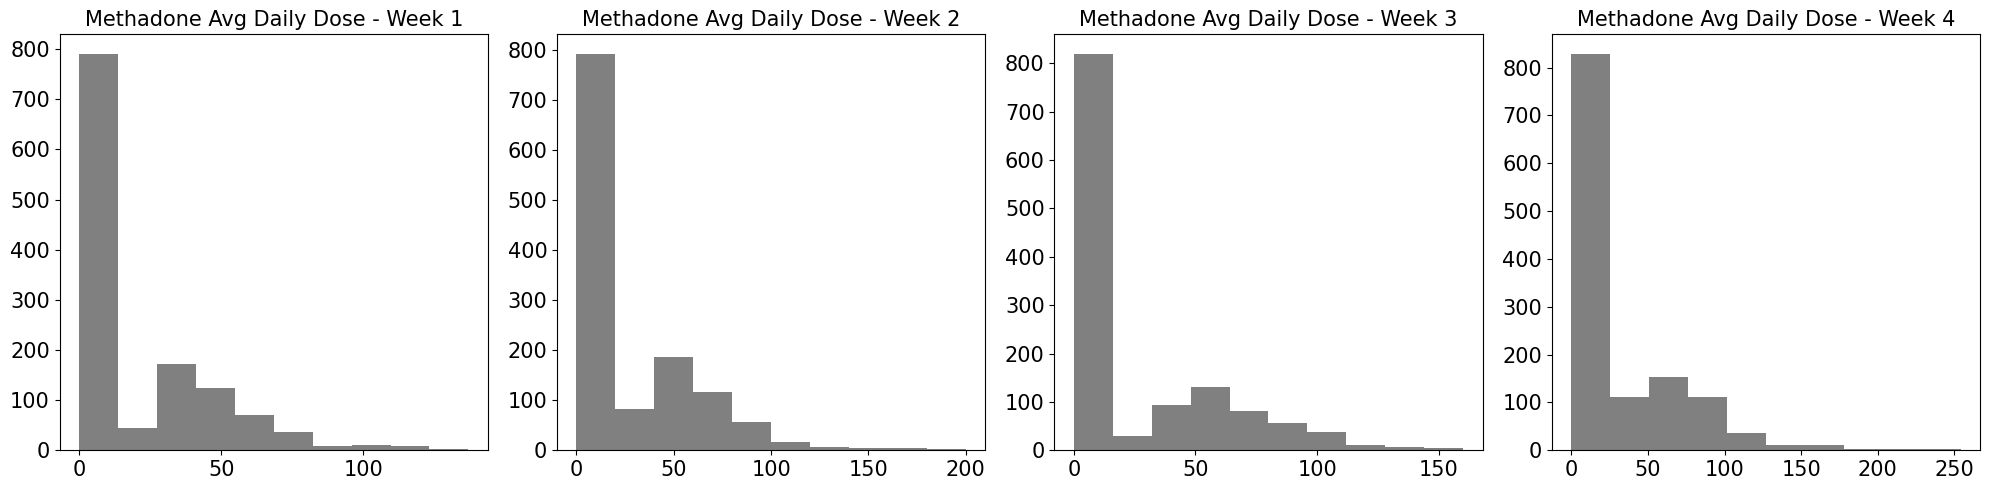

In [22]:
import matplotlib.pyplot as plt

# Assuming meds_m is a DataFrame with at least 4 columns
fig, ax = plt.subplots(1, 4, figsize=(20, 5))  # Create a figure with 4 subplots in 1 row

# Titles for each subplot
titles = ['Methadone Avg Daily Dose - Week 1', 'Methadone Avg Daily Dose - Week 2', 'Methadone Avg Daily Dose - Week 3', 'Methadone Avg Daily Dose - Week 4']

# Plot histograms for the first 4 columns of meds_m
for i, column in enumerate(meds_m.columns[:4]):
    meds_m[column].hist(ax=ax[i], color='gray', bins=10)
    ax[i].set_title(titles[i], fontsize=15)  # Set the title to the corresponding week with larger font size
    ax[i].tick_params(axis='both', which='major', labelsize=15)  # Set tick parameters with larger font size
    ax[i].grid(False)  # Remove the background grid

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

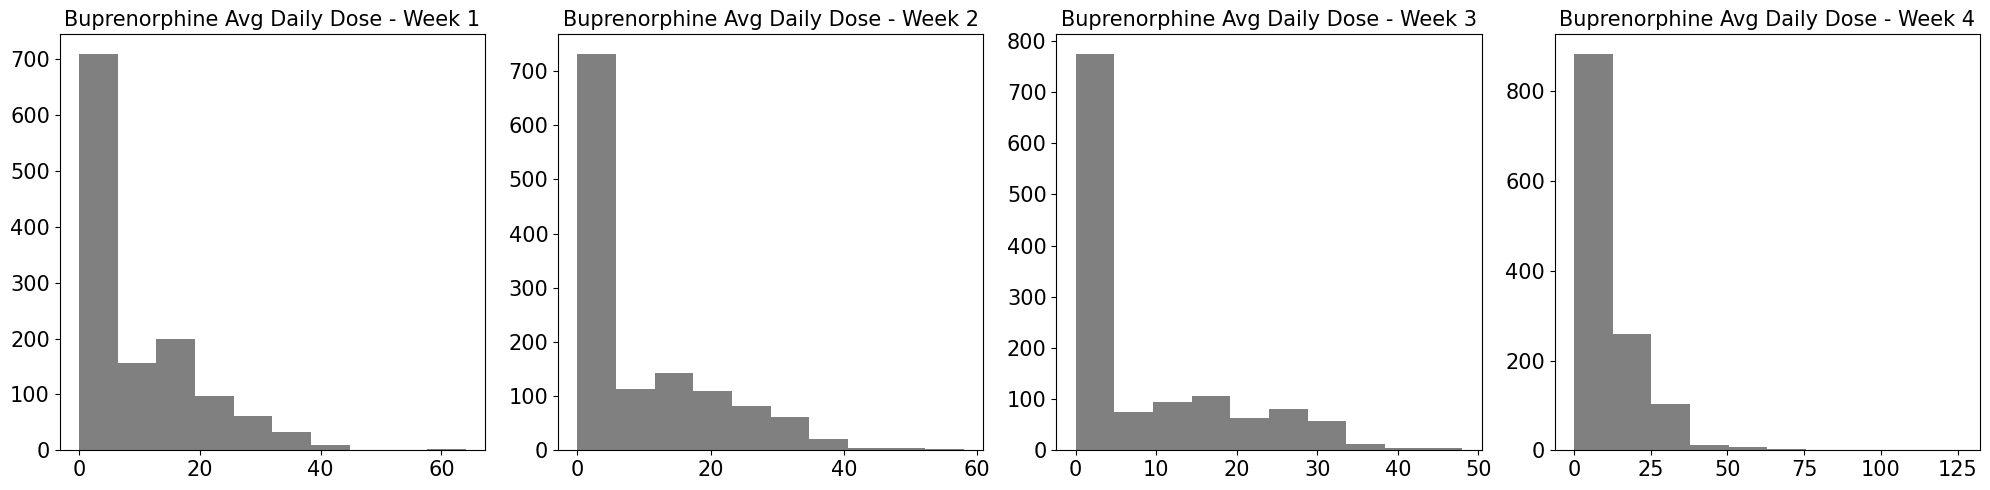

In [23]:
# Assuming meds_m is a DataFrame with at least 4 columns
fig, ax = plt.subplots(1, 4, figsize=(20, 5))  # Create a figure with 4 subplots in 1 row

# Titles for each subplot
titles = ['Buprenorphine Avg Daily Dose - Week 1', 'Buprenorphine Avg Daily Dose - Week 2', 'Buprenorphine Avg Daily Dose - Week 3', 'Buprenorphine Avg Daily Dose - Week 4']

# Plot histograms for the first 4 columns of meds_m
for i, column in enumerate(meds_b.columns[:4]):
    meds_b[column].hist(ax=ax[i], color='gray', bins=10)
    ax[i].set_title(titles[i], fontsize=15)  # Set the title to the corresponding week with larger font size
    ax[i].tick_params(axis='both', which='major', labelsize=15)  # Set tick parameters with larger font size
    ax[i].grid(False)  # Remove the background grid

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [24]:
tests = data[[col for col in data.columns if 'test' in col]]

tests

,test_oxycodone_0,test_cocaine_0,test_methamphetamine_0,test_opiate300_0,test_oxycodone_1,test_cocaine_1,test_methamphetamine_1,test_opiate300_1,test_oxycodone_2,test_cocaine_2,test_methamphetamine_2,test_opiate300_2,test_oxycodone_3,test_cocaine_3,test_methamphetamine_3,test_opiate300_3,test_oxycodone_4,test_cocaine_4,test_methamphetamine_4,test_opiate300_4
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1265,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1266,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1267,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [26]:
# plot drug test counts for first 4 weeks of treatment

# create df with count of all drug tests
drugs = ['oxycodone', 'cocaine', 'methamphetamine', 'opiate300']

# Create a df for each drug class with the corresponding columns
for drug in drugs:
    globals()[drug] = tests[[col for col in tests.columns if drug in col]]
    # Remove column names, leaving suffix for week of treatment
    globals()[drug].columns = [re.sub('.*?_', '', col) for col in globals()[drug].columns]
    # Apply sum aggregation to columns
    globals()[drug] = globals()[drug].sum(axis=0).to_frame(f'{drug}').reset_index(drop=True)

# Merge all drug classes into a single df
drug_tests = pd.concat([oxycodone, cocaine, methamphetamine, opiate300], axis=1).reset_index(drop=True)

drug_tests

,oxycodone,cocaine,methamphetamine,opiate300
0,182.0,474.0,111.0,1107.0
1,257.0,573.0,292.0,752.0
2,323.0,608.0,341.0,721.0
3,377.0,653.0,409.0,727.0
4,343.0,618.0,371.0,690.0


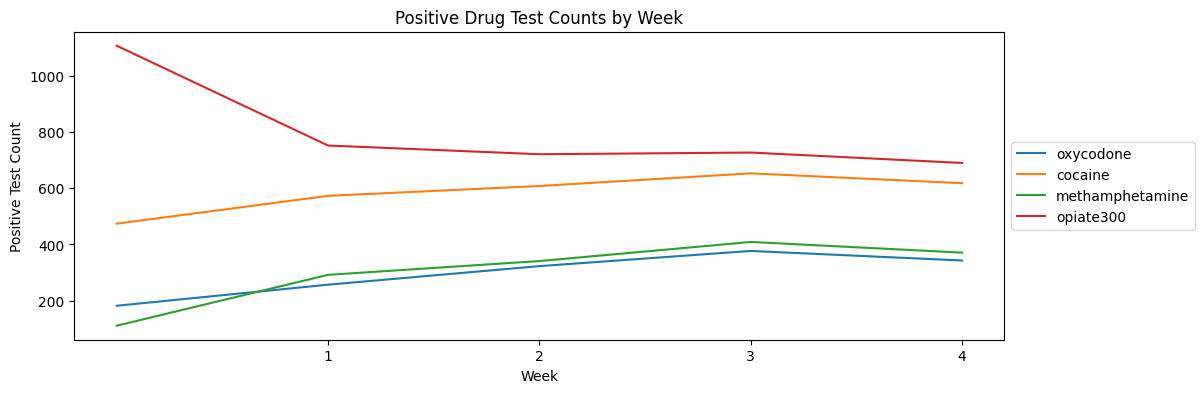

In [34]:
# create line plot with drug test df
plt.figure(figsize=(12, 4))
for drug in drugs:
    plt.plot(drug_tests[drug], label=drug)
plt.title('Positive Drug Test Counts by Week')
plt.xlabel('Week')
plt.ylabel('Positive Test Count')
# put legend outside of plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# only included 1 - 4 on x-axis
plt.xticks(np.arange(1, 5, 1))

plt.show()